# Práctica 1

### General

In [1]:
# Carga de librerías necesarias
import numpy as np
from numpy import sign
import sympy as sp
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 

from math import sin, cos, pi

from decimal import * # Este módulo nos permitirá trabajar con una precisión determinada
getcontext()

from colorama import Fore, Back, Style # Colores en el output

In [2]:
def Title(msg):
    return Style.BRIGHT + Fore.BLACK + Back.WHITE + msg + Style.RESET_ALL

In [3]:
nmax = 1000000              # Número máximo de iteraciones
cifras = 16                 # Número de cifras con el que queremos calcular
getcontext().prec = cifras  # Presentamos los resultados con esa precisión
tol = 10**(-cifras)         # Tolerancia
prec = 10**(-16)            # Precisión

ajustes_por_defecto = {'nmax' : nmax, 'cifras' : cifras, 'tol' : tol, 'prec' : prec}

### Ejercicio 1

Teniendo en cuenta la recomendación explicada sobre los criterios de parada, codifica una función similar a la explicada en el método de bisección para el método de la secante.
 
 Aproxima la raíz de la función $f(x)=e^x-3$:
 * Cambiando la precisión a 5 cifras significativas.
 * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

In [4]:
def secante(f, x_0, x_1, nmax=nmax, tol=tol, prec=prec):
    n = 0
    cont = True
    exitmsg = ''

    x = [x_0, x_1]


    while n < nmax and cont:
        n += 1
        
        x_next = x[n] - ((x[n]-x[n-1])/(f(x[n])-f(x[n-1])))*f(x[n])
        x.append(x_next)

        if abs(x_next - x[n]) < tol:
            exitmsg = 'tolerancia'
            cont = False
        
        if abs(f(x_next))<prec:
            exitmsg = 'precision'
            cont = False

    if n == nmax:
        exitmsg = 'iteraciones'
    
    return {
        "resultado": x[n+1], 
        "exit":exitmsg, 
        "niter":n
    }

In [5]:
# Definimos la función
def f(x):
    return np.exp(x)-3

# Definimos la función
def fsym(x):
    return sp.exp(x)-3

In [6]:
x = sp.Symbol('x')

x_0 = Decimal(0)
x_1 = Decimal(2)

# Ajustamos la precisión
cifras = 5                 # Número de cifras con el que queremos calcular
prec = 10**(-cifras)       # Precisión
getcontext().prec = cifras

resultado = secante (f, x_0, x_1, nmax, tol, prec)

print(Title("Evaluación del método de la secante para 5 cifras significativas:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[0]).evalf(5)}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

print('\n')

# Ajustamos la precisión y la tolerancia
prec = ajustes_por_defecto['prec']
tol = 10**(-28)                     # 28 cifras significativas
getcontext().prec = 28

resultado = secante (f, x_0, x_1, nmax, tol, prec)

print(Title("Evaluación del método de la secante para 28 cifras significativas:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[0]).evalf(28)}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']
cifras = ajustes_por_defecto['cifras']
getcontext().prec = cifras

Evaluación del método de la secante para 5 cifras significativas:
	Resultado calculado: 1.0986
	Resultado exacto: 1.0986
	Salida: precision
	Número de iteraciones: 6


Evaluación del método de la secante para 28 cifras significativas:
	Resultado calculado: 1.098612288668109688475642587
	Resultado exacto: 1.098612288668109691395245237
	Salida: precision
	Número de iteraciones: 8


### Ejercicio 2


Teniendo en cuenta estos primeros pasos, codifica una función para el método de Wittaker.
 
 Aproxima la raíz de la función $f(x)=e^x-3$:
 * Cambiando la precisión a 5 cifras significativas.
 * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.
 
 Comprueba que una mala elección de $m$ puede provocar que la sucesión no converja.

In [7]:
def wittaker(f, x_0, m, nmax=nmax, tol=tol, prec=prec):
    n = 0
    cont = True
    exitmsg = ''

    x = [x_0]


    while n < nmax and cont:
        
        x_next = x[n] - f(x[n])/m
        x.append(x_next)

        n += 1

        if abs(x_next - x[n-1]) < tol:
            exitmsg = 'tolerancia'
            cont = False
        
        if abs(f(x_next))<prec:
            exitmsg = 'precision'
            cont = False

    if n == nmax:
        exitmsg = 'iteraciones'
    
    return {
        "resultado": x[n], 
        "exit":exitmsg, 
        "niter":n
    }

In [8]:
x_0 = Decimal(0)
m = Decimal(10)

# Ajustamos la precisión
cifras = 5                 # Número de cifras con el que queremos calcular
prec = 10**(-cifras)       # Precisión
getcontext().prec = cifras

resultado = wittaker (f, x_0, m, nmax, tol, prec)

print(Title("Evaluación del método de wittaker para 5 cifras significativas:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[0]).evalf(cifras)}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

print('\n')

# Ajustamos la precisión y la tolerancia
prec = ajustes_por_defecto['prec']
cifras = 28                            # 28 cifras significativas
tol = 10**(-cifras)                     
getcontext().prec = cifras

resultado = wittaker (f, x_0, m, nmax, tol, prec)

print(Title("Evaluación del método de wittaker para 28 cifras significativas:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[0]).evalf()}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")
print('\n')

# Ajustamos la precisión y la tolerancia
prec = ajustes_por_defecto['prec']
tol = ajustes_por_defecto['tol']
cifras = ajustes_por_defecto['cifras']
getcontext().prec = cifras

x_0 = Decimal(0)
m = Decimal(0.1)

nmax = 500000 # Le ponemos un número de iteraciones lo suficientemente grande para ver que no converge

resultado = wittaker (f, x_0, m, nmax, tol, prec)

# Veamos que no converge
print(Title(f"Evaluación del método de wittaker para m = {m}:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[0]).evalf()}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']
cifras = ajustes_por_defecto['cifras']
getcontext().prec = cifras

Evaluación del método de wittaker para 5 cifras significativas:
	Resultado calculado: 1.0985
	Resultado exacto: 1.0986
	Salida: tolerancia
	Número de iteraciones: 29


Evaluación del método de wittaker para 28 cifras significativas:
	Resultado calculado: 1.098612288668109658771656279
	Resultado exacto: 1.09861228866811
	Salida: precision
	Número de iteraciones: 109


Evaluación del método de wittaker para m = 0.1000000000000000055511151231257827021181583404541015625:
	Resultado calculado: -4836651964.097903
	Resultado exacto: 1.09861228866811
	Salida: iteraciones
	Número de iteraciones: 500000


### Ejercicio 3

Modifique el método anterior para que, en lugar de fijar una pendiente $m$, calcule en cada iteración la derivada de la función en dicho punto, obteniendo el método de Newton-Raphson. Con este método:
 
 Aproxima la raíz de la función $f(x)=e^x-3$:
 * Cambiando la precisión a 5 cifras significativas.
 * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.
 
 Compare, en iguales condiciones, el rendimiento de Newton-Raphson con respecto al método de Wittaker.

In [9]:
def Newton_Raphson(f, df, x_0, nmax=nmax, tol=tol, prec=prec):
    n = 0
    cont = True
    exitmsg = ''

    x = [x_0]


    while n < nmax and cont:
        n += 1
        
        x_next = x[n-1] - f(x[n-1])/df(x[n-1])        
        x.append(x_next)

        if abs(x_next - x[n-1]) < tol:
            exitmsg = 'tolerancia'
            cont = False
        
        if abs(f(x_next))<prec:
            exitmsg = 'precision'
            cont = False

    if n == nmax:
        exitmsg = 'iteraciones'
    
    return {
        "resultado": x[n], 
        "exit":exitmsg, 
        "niter":n
    }

In [10]:
# derivada de f
def df(x): return np.exp(x)

In [11]:
x_0 = Decimal(0)

# Ajustamos la precisión
cifras = 5                 # Número de cifras con el que queremos calcular
prec = 10**(-cifras)       # Precisión
getcontext().prec = 5

resultado = Newton_Raphson(f, df, x_0, nmax, tol, prec)

print(Title("Evaluación del método de Newton-Raphson para 5 cifras significativas:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[0]).evalf(5)}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

print('\n')

# Ajustamos la precisión y la tolerancia
prec = ajustes_por_defecto['prec']
cifras = ajustes_por_defecto['cifras']
tol = 10**(-28)                     # 28 cifras significativas

getcontext().prec = 28

resultado = Newton_Raphson(f, df, x_0, nmax, tol, prec)

print(Title("Evaluación del método de Newton-Raphson para 28 cifras significativas:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[0]).evalf(28)}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']

Evaluación del método de Newton-Raphson para 5 cifras significativas:
	Resultado calculado: 1.0986
	Resultado exacto: 1.0986
	Salida: precision
	Número de iteraciones: 5


Evaluación del método de Newton-Raphson para 28 cifras significativas:
	Resultado calculado: 1.098612288668109691395245240
	Resultado exacto: 1.098612288668109691395245237
	Salida: precision
	Número de iteraciones: 7


Se puede observar que el método de Newton-Raphson es mejor para 5 cifras significativas pero vemos que es peor para 28.

### Ejercicio 4

Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.

In [12]:
# definimos la función
def f(x):
    return x**3+4*x**2-10

def fsym(x):
    return x**3+4*x**2-10

def df(x):
    return 3*x**2+4

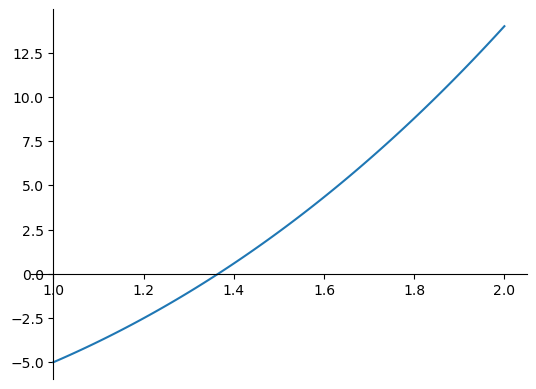

In [13]:
# Extremos del intervalo
a = 1
b = 2

n_puntos = 100
x_values = np.linspace(a,b,n_puntos)
y_values = np.array(list(map(f,x_values)))

fig, ax = plt.subplots()

# Si queremos evitar que se dibujen los ejes derecho y superior de la figura
ax.spines['right'].set_color('none')    # borde derecho
ax.spines['top'].set_color('none')      # borde superior

# Fijar la posición de las marcas en la parte inferior
ax.xaxis.set_ticks_position('bottom')
# Situar el eje Ox en la recta horizontal y=1
ax.spines['bottom'].set_position(('data',0))

# Fijar la posición de las marcas a la izquierda del eje Oy
ax.yaxis.set_ticks_position('left')
# Situar el eje Oy en la recta vertical x=0
ax.spines['left'].set_position(('data',a))

# Mostramos el gráfico despues de las modificaciones
ax.plot(x_values, y_values)

Como se puede ver la gráfica de la función $f(x) = x^3 + 4x^2 - 10 $ tan solo corta una vez al eje x por lo que solo tiene una raíz en dicho intervalo

In [14]:
def biseccion(f, a, b, nmax=nmax, tol=tol, prec=prec):
    niter = 0
    cont = True
    exit = ''
    while niter < nmax and cont:
        niter += 1
        c = (a+b)/2
        if abs(f(c)) < prec:    # Si |f(c)|< prec
            exit = 'precision'
            cont = False
        elif sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c

        if b-a < tol:
            exit = 'tolerancia'
            cont = False

    if(niter == nmax):
        exit = 'iteraciones'
            
    return {
        "resultado": c, 
        "exit": exit, 
        "niter": niter
    }

In [15]:
# Ajustamos la precisión
cifras = 4                 # Número de cifras con el que queremos calcular
tol = 10**(-cifras)       

resultado = biseccion(f, a, b, nmax, tol, prec)

print(Title(f"Evaluación del método de biseccion para 3 cifras decimales exactas:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[2]).evalf(cifras)}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

print('\n')

# Ajustamos la precisión y la tolerancia
cifras = 3
tol = 10**(-3)

resultado = Newton_Raphson(f, df, 1, nmax, tol, prec)

print(Title(f"Evaluación del método de Newton-Raphson para tol = {tol}:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[2]).evalf()}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")
print('\n')

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']
cifras = ajustes_por_defecto['cifras']
getcontext().prec = cifras

Evaluación del método de biseccion para 3 cifras decimales exactas:
	Resultado calculado: 1.36517333984375
	Resultado exacto: 1.365
	Salida: tolerancia
	Número de iteraciones: 14


Evaluación del método de Newton-Raphson para tol = 0.001:
	Resultado calculado: 1.3656166066945985
	Resultado exacto: 1.36523001341410
	Salida: tolerancia
	Número de iteraciones: 21




### Ejercicio 5

Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.
 
 1. $3x=2+x^2-e^x$.
 
 2. $x^2+10 \cos x+x=0$.

#### Apartado 1

In [16]:
def g(x):
    return x**2 - 3*x - 2 + np.exp(x)

def dg(x):
    return 2*x -3 + np.exp(x)

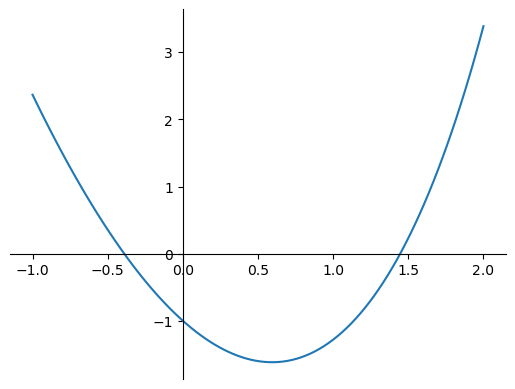

In [17]:
# Extremos del intervalo
a = -1
b = 2

n_puntos = 100
x_values = np.linspace(a,b,n_puntos)
y_values = np.array(list(map(g,x_values)))

fig, ax = plt.subplots()

# Si queremos evitar que se dibujen los ejes derecho y superior de la figura
ax.spines['right'].set_color('none')    # borde derecho
ax.spines['top'].set_color('none')      # borde superior

# Fijar la posición de las marcas en la parte inferior
ax.xaxis.set_ticks_position('bottom')
# Situar el eje Ox en la recta horizontal y=1
ax.spines['bottom'].set_position(('data',0))

# Fijar la posición de las marcas a la izquierda del eje Oy
ax.yaxis.set_ticks_position('left')
# Situar el eje Oy en la recta vertical x=0
ax.spines['left'].set_position(('data',0))

# Mostramos el gráfico despues de las modificaciones
ax.plot(x_values, y_values)

Podemos ver que esta primera función tiene una raíz en $[-0.5, 0]$ y $[1, 1.5]$

In [18]:
# Ajustamos la precisión
tol = 10**(-5)                     # 28 cifras significativas

x_0 = -0.5

resultado = Newton_Raphson(g, dg, x_0 , nmax, tol, prec)

print(Title("Evaluación del método de Newton-Raphson para la primera raíz:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

print('\n')

x_0 = 1.5

resultado = Newton_Raphson(g, dg, x_0 , nmax, tol, prec)

print(Title("Evaluación del método de Newton-Raphson para la segunda raíz:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']

Evaluación del método de Newton-Raphson para la primera raíz:
	Resultado calculado: -0.39027168619771285
	Salida: tolerancia
	Número de iteraciones: 3


Evaluación del método de Newton-Raphson para la segunda raíz:
	Resultado calculado: 1.446238685974197
	Salida: tolerancia
	Número de iteraciones: 3


#### Apartado 2

In [19]:
def h(x):
    return x**2 + 10 * np.cos(x) + x

def dh(x):
    return 2*x -10* np.sin(x) + 1

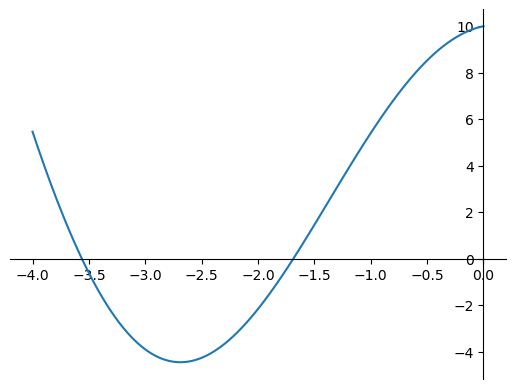

In [20]:
# Extremos del intervalo
a = -4
b = 0

n_puntos = 100
x_values = np.linspace(a,b,n_puntos)
y_values = np.array(list(map(h,x_values)))

fig, ax = plt.subplots()

# Si queremos evitar que se dibujen los ejes derecho y superior de la figura
ax.spines['right'].set_color('none')    # borde derecho
ax.spines['top'].set_color('none')      # borde superior

# Fijar la posición de las marcas en la parte inferior
ax.xaxis.set_ticks_position('bottom')
# Situar el eje Ox en la recta horizontal y=1
ax.spines['bottom'].set_position(('data',0))

# Fijar la posición de las marcas a la izquierda del eje Oy
ax.yaxis.set_ticks_position('left')
# Situar el eje Oy en la recta vertical x=0
ax.spines['left'].set_position(('data',0))

# Mostramos el gráfico despues de las modificaciones
ax.plot(x_values, y_values)

De nuevo vemos que hay una raíz en $[-4, -3.5]$ y otra en $[-2,-1.5]$

In [21]:
# Ajustamos la precisión
tol = 10**(-5)                     # 28 cifras significativas

x_0 = -4

resultado = Newton_Raphson(h, dh, x_0 , nmax, tol, prec)

print(Title("Evaluación del método de Newton-Raphson para la primera raíz:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

print('\n')

x_0 = -1.4

resultado = Newton_Raphson(h, dh, x_0 , nmax, tol, prec)

print(Title("Evaluación del método de Newton-Raphson para la segunda raíz:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']

Evaluación del método de Newton-Raphson para la primera raíz:
	Resultado calculado: -3.5623314972388327
	Salida: tolerancia
	Número de iteraciones: 4


Evaluación del método de Newton-Raphson para la segunda raíz:
	Resultado calculado: -1.6869398997844935
	Salida: tolerancia
	Número de iteraciones: 3


### Ejercicio 6

Para la función  $ f(x)= 3 x^2+e^x-1$,
 
 i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;
 
 ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

In [22]:
def f(x):
    return 3*x**2 + np.exp(x) -1
def df(x):
    return 6*x + np.exp(x)

#### Apartado 1

In [23]:
# Ajustamos la precisión
tol = 10**(-4)                     # 4 decimales exactos

# Extremos del intervalo
a = Decimal(0)
b = Decimal(1)

resultado = biseccion(f, a, b, nmax, tol, prec)

print(Title("Evaluación del método de bisección con 4 decimales exactos:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']

Evaluación del método de bisección con 4 decimales exactos:
	Resultado calculado: 0.00006103515625
	Salida: tolerancia
	Número de iteraciones: 14


#### Apartado 2

In [24]:
# Ajustamos la precisión
tol = 10**(-4)                     # 4 decimales exactos

# Semilla
x_0 = Decimal(0)

resultado = Newton_Raphson(f, df, x_0, nmax, tol, prec)

print(Title("Evaluación del método de Newton-Raphson con 4 decimales exactos:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']

Evaluación del método de Newton-Raphson con 4 decimales exactos:
	Resultado calculado: 0
	Salida: precision
	Número de iteraciones: 1


### Ejercicio 7

Implemente el método de iteración funcional de Steffensen para una función $f$. En particular, para la función $f(x)=e^x-3$:
 * Represente gráficamente las funciones $g$ definidas tanto para el método de Newton-Raphson como para el método de Steffensen, comprobando que ambas poseen un punto fijo en la raíz de $f$.
 * Aproxima su única raíz utilizando el método de Steffensen:
     * Cambiando la precisión a 5 cifras significativas.
     * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

In [25]:
def f(x):
    return np.exp(x)-3

def fsym(x):
    return sp.exp(x)-3

def df(x):
    return np.exp(x)


#### Apartado 1

In [26]:

# g de Newton-Raphson
def g_NR(x):
    return x - (f(x)/df(x))

# g de Steffensen
def g_S(x):
    return x - (f(x)**2/(f(x+f(x))-f(x)))   

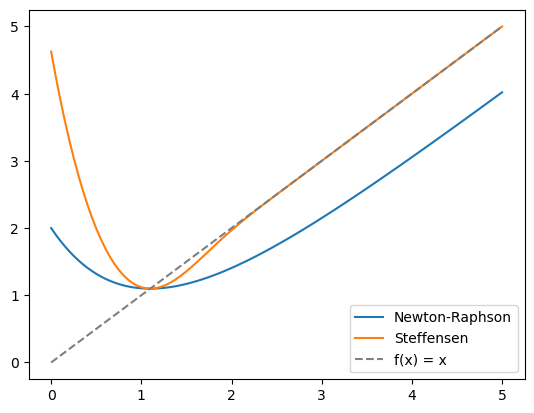

In [27]:
# Extremos del intervalo
a = 0
b = 5

# Si queremos evitar que se dibujen los ejes derecho y superior de la figura
ax.spines['right'].set_color('none')    # borde derecho
ax.spines['top'].set_color('none')      # borde superior

# Fijar la posición de las marcas en la parte inferior
ax.xaxis.set_ticks_position('bottom')
# Situar el eje Ox en la recta horizontal y=1
ax.spines['bottom'].set_position(('data',0))

# Fijar la posición de las marcas a la izquierda del eje Oy
ax.yaxis.set_ticks_position('left')
# Situar el eje Oy en la recta vertical x=0
ax.spines['left'].set_position(('data',0))

n_puntos = 100
x_values = np.linspace(a,b,n_puntos)
y_values = np.array(list(map(g_NR,x_values)))

fig, ax = plt.subplots()

# Mostramos el gráfico de NR 
ax.plot(x_values, y_values, label='Newton-Raphson')

y_values = np.array(list(map(g_S,x_values)))

# Mostramos el gráfico de Steffensen
ax.plot(x_values, y_values, label='Steffensen')

# Mostramos la función f(x)=x (punto fijo)
ax.plot(x_values, x_values, label='f(x) = x', linestyle='--', color='gray')

# agregamos la leyenda
ax.legend()

Como se puede ver ambas funciones tienen un punto fijo (el mismo) que es la intersección de las 3 gráficas

#### Apartado 2

In [28]:
def Steffensen(f, x_0, nmax=nmax, tol=tol, prec=prec):
    n = 0
    cont = True
    exitmsg = ''

    x = [x_0]


    while n < nmax and cont:
        
        
        x_next = x[n] - (f(x[n])**2/(f(x[n]+f(x[n]))-f(x[n])))       
        x.append(x_next)

        n += 1

        if abs(x_next - x[n-1]) < tol:
            exitmsg = 'tolerancia'
            cont = False
        
        if abs(f(x_next))<prec:
            exitmsg = 'precision'
            cont = False

    if n == nmax:
        exitmsg = 'iteraciones'
    
    return {
        "resultado": x[n], 
        "exit":exitmsg, 
        "niter":n
    }

In [29]:
# Ajustamos la precisión
prec = 10**(-5)                     # 5 cifras significativas

# Semilla
x_0 = Decimal(1)

resultado = Steffensen(f, x_0, nmax, tol, prec)

print(Title("Evaluación del método de Steffensen con 5 cifras significativas:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[0]).evalf(5)}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

print('\n')

prec = ajustes_por_defecto['prec']

# Ajustamos la tolerancia
tol = 10**(-28)

getcontext().prec = 28
resultado = Steffensen(f, x_0, nmax, tol, prec)

print(Title("Evaluación del método de Steffensen con 28 cifras significativas:"))
print(f"\tResultado calculado: {resultado["resultado"]}")
print(f"\tResultado exacto: {(sp.solve(fsym(x),x)[0]).evalf(28)}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']
cifras = ajustes_por_defecto['cifras']
getcontext().prec = cifras

Evaluación del método de Steffensen con 5 cifras significativas:
	Resultado calculado: 1.098613623780496
	Resultado exacto: 1.0986
	Salida: precision
	Número de iteraciones: 3


Evaluación del método de Steffensen con 28 cifras significativas:
	Resultado calculado: 1.098612288668109691395270656
	Resultado exacto: 1.098612288668109691395245237
	Salida: precision
	Número de iteraciones: 5


### Ejercicio 8

Implemente el método de aceleración de la convergencia de Steffensen y aplíquelo a una sucesión de valores obtenidos mediante iteración funcional de Newton-Raphson a la función $f(x) = e^x -3$. Compare las aproximaciones tras 4 iteraciones del método de Newton-Raphson, aceleración de la convergencia de Aitken y aceleración de la convergencia de Steffensen.

### Ejercicio 9


Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):
 
 i) $f(x)=x^7-x^4+2$ ,
 
 ii) $f(x)=x^7+\cos  x-3$.

#### Apartado 1

In [30]:
def f(x):
    return x**7 - x**4 + 2

In [31]:
resultado = sp.solve(f(x),x)

print(Title("Cálculo de raíces con funciones de python:"))

n=0

for r in resultado :
    n+=1
    print(f"\tRaíz {n}: {r.evalf()}")


Cálculo de raíces con funciones de python:
	Raíz 1: -1.00000000000000
	Raíz 2: -0.713102145851293 - 0.98823188827156*I
	Raíz 3: -0.713102145851293 + 0.98823188827156*I
	Raíz 4: 1.06110281046036 - 0.376384046559108*I
	Raíz 5: 1.06110281046036 + 0.376384046559108*I
	Raíz 6: 0.151999335390936 - 1.01945594669063*I
	Raíz 7: 0.151999335390936 + 1.01945594669063*I


#### Apartado 2

In [32]:
def f(x):
    return x**7 + np.cos(x) -3

In [33]:
resultado = fsolve(f, 1.0)

print(Title("Cálculo de raíces con funciones de python:"))

n=0

for r in resultado :
    n+=1
    print(f"\tRaíz {n}: {r}")


Cálculo de raíces con funciones de python:
	Raíz 1: 1.1454598072700084


### Ejercicio 10

De los métodos implementados en los anteriores ejercicios, utiliza el método o métodos numéricos que desees para aproximar la primera raíz de la función
 $$
 f:[0,1]\longrightarrow\mathbb R \\
 f(x) = x(1-x)\sin\left(\dfrac{2\pi}{x+1/10}\right)
 $$
 que sea mayor que una milésima con una precisión de 28 cifras significativas y utilizando el menor número de iteraciones posible. Imprime por pantalla tu aproximación y el número de iteraciones utilizado.

In [37]:
def f(x):
    x= float(x)
    return x*(1-x)*sp.sin(2*sp.pi/(x + (1/10)))

def fnum(x):
    return x*(1-x)*np.sin(2*np.pi/(x + (1/10)))

def df(x):
    x = float(x)
    return (1-x)*sp.sin(2*sp.pi/(x + (1/10))) - x * sp.sin(2*sp.pi/(x + (1/10))) + x*(1-x)*sp.cos(2*sp.pi/(x + (1/10)))*(-2*sp.pi/(x+(1/10)**2))

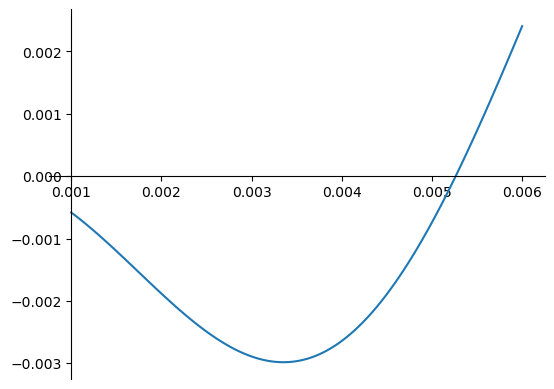

In [38]:
# Extremos del intervalo
a = 0.001
b = 0.006

n_puntos = 100
x_values = np.linspace(a,b,n_puntos)
y_values = np.array(list(map(f,x_values)))

fig, ax = plt.subplots()

# Si queremos evitar que se dibujen los ejes derecho y superior de la figura
ax.spines['right'].set_color('none')    # borde derecho
ax.spines['top'].set_color('none')      # borde superior

# Fijar la posición de las marcas en la parte inferior
ax.xaxis.set_ticks_position('bottom')
# Situar el eje Ox en la recta horizontal y=1
ax.spines['bottom'].set_position(('data',0))

# Fijar la posición de las marcas a la izquierda del eje Oy
ax.yaxis.set_ticks_position('left')
# Situar el eje Oy en la recta vertical x=0
ax.spines['left'].set_position(('data',0.001))

# Mostramos el gráfico despues de las modificaciones
ax.plot(x_values, y_values)

In [40]:
getcontext().prec = 28
prec = 10**(-28)
tol = 10**(-28) # Para obligarlo a salir por precisión

x_0 = Decimal(0.00525)

resultado = Newton_Raphson(f, df, x_0, nmax, tol, prec)


print(Title("Evaluación del método de Steffensen con 28 cifras significativas:"))
print(f"\tResultado calculado: {resultado["resultado"].evalf()}")
print(f"\tSalida: {resultado["exit"]}")
print(f"\tNúmero de iteraciones: {resultado["niter"]}")

# Devolvemos los ajustes a por defecto
prec = ajustes_por_defecto['prec']
nmax = ajustes_por_defecto['nmax']
tol = ajustes_por_defecto['tol']
cifras = ajustes_por_defecto['cifras']
getcontext().prec = cifras

Evaluación del método de Steffensen con 28 cifras significativas:
	Resultado calculado: 0.00526315789473683
	Salida: precision
	Número de iteraciones: 30
